* ### In this notebook, we will use Tensorflow Bert model to classify spam emails

* ### We compare the results of imbalanced and balanced data

* ### The dataset is downloaded from: https://www.kaggle.com/venky73/spam-mails-dataset

In [1]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Data/

/content/drive/MyDrive/Colab Notebooks/Data


In [3]:
!ls

animal10			 model.h5
animal10Predictor_weights.hdf5	 __pycache__
archive.zip			 raw-img
cats_and_dogs_filtered		 raw-intel-images
cell_images			 spam_email.zip
chest_xray			 spam_ham_dataset.csv
chest_xray.zip			 Tf_flower_images
flower_photos			 tf_flowers_predictor.h5
flower_photos.tar.gz		 tomato-leaf_disease
intelimage_mobilenet_weights.h5  tomato_leaf_disease_predictor.h5
intel_images.zip		 tomato_leaf.zip
malaria_mobilenet_weights.h5	 translate.py
Maleria_cell_images.zip


In [5]:
#!unzip spam_email.zip

Archive:  spam_email.zip
  inflating: spam_ham_dataset.csv    


In [6]:
!ls

animal10			 model.h5
animal10Predictor_weights.hdf5	 __pycache__
archive.zip			 raw-img
cats_and_dogs_filtered		 raw-intel-images
cell_images			 spam_email.zip
chest_xray			 spam_ham_dataset.csv
chest_xray.zip			 Tf_flower_images
flower_photos			 tf_flowers_predictor.h5
flower_photos.tar.gz		 tomato-leaf_disease
intelimage_mobilenet_weights.h5  tomato_leaf_disease_predictor.h5
intel_images.zip		 tomato_leaf.zip
malaria_mobilenet_weights.h5	 translate.py
Maleria_cell_images.zip


In [ ]:
!pip install tensorflow_text

In [4]:
import pandas as pd
df = pd.read_csv('spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
df.shape

(5171, 4)

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df['label_num'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [12]:
df.groupby('label').describe()

label_num                                   
          count mean  std  min  25%  50%  75%  max
label                                             
ham      3672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
spam     1499.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [13]:
df_ham = df[df['label']=='ham']
df_ham.shape

(3672, 3)

In [14]:
df_spam = df[df['label']=='spam']
df_spam.shape

(1499, 3)

In [16]:
df_ham_sampled = df_ham.sample(df_spam.shape[0])
df_ham_sampled.shape

(1499, 3)

In [19]:
df_balanced = pd.concat([df_ham_sampled, df_spam], axis=0)

In [20]:
df_balanced['label'].value_counts()

spam    1499
ham     1499
Name: label, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label_num'],
                                                    stratify=df['label_num'],
                                                    test_size=0.2, random_state=0)

# Importing Bert Model

In [21]:
bert_model_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
bert_preprocessing_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

In [24]:
# Creating keras layers using BERT model
import tensorflow_hub as hub
import tensorflow_text as text
bert_model = hub.KerasLayer(bert_model_url)
preprocessing_unit = hub.KerasLayer(bert_preprocessing_url)

In [25]:
text = ['I like the movie', 'Auro is a bad dog']
preprocessed_text = preprocessing_unit(text)


In [26]:
text[1]

'Auro is a bad dog'

In [27]:
preprocessed_text.keys()

dict_keys(['input_word_ids', 'input_type_ids', 'input_mask'])

In [28]:
preprocessed_text['input_word_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[ 101, 1045, 2066, 1996, 3185,  102,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [ 101, 8740, 3217, 2003, 1037, 2919, 3899,  102,    0,    0,    0,
           0,

In [29]:
encoded_text = bert_model(preprocessed_text)

In [30]:
type(encoded_text)

dict

In [31]:
encoded_text.keys()

dict_keys(['pooled_output', 'default', 'sequence_output', 'encoder_outputs'])

In [32]:
encoded_text['pooled_output']

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.7997608 , -0.21087171,  0.51771784, ...,  0.39697957,
        -0.5365357 ,  0.8296885 ],
       [-0.83660084, -0.3695558 , -0.41739222, ..., -0.12472763,
        -0.57028675,  0.85754997]], dtype=float32)>

In [39]:
def get_embedded_vectors(sentences):
  process_text = preprocessing_unit(sentences)
  return bert_model(process_text)['pooled_output']

get_embedded_vectors(text)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.7997608 , -0.21087171,  0.51771784, ...,  0.39697957,
        -0.5365357 ,  0.8296885 ],
       [-0.83660084, -0.3695558 , -0.41739222, ..., -0.12472763,
        -0.57028675,  0.85754997]], dtype=float32)>

In [40]:
names = ['apple', 'banana', 'gold', 'facebook', 'instagram', 'silver']
e = get_embedded_vectors(names)

In [43]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[1]], [e[2]])

array([[0.8455141]], dtype=float32)

In [44]:
cosine_similarity([e[1]], [e[3]])

array([[0.62593216]], dtype=float32)

In [45]:
cosine_similarity([e[1]], [e[0]])

array([[0.9659779]], dtype=float32)

In [46]:
cosine_similarity([e[4]], [e[3]])

array([[0.9875035]], dtype=float32)

# Build Model

In [47]:
# Bert Model
input_text = tf.keras.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = preprocessing_unit(input_text)
encoded_text = bert_model(preprocessed_text)

# keras
l = tf.keras.layers.Dropout(0.1, name="dropout")(encoded_text['pooled_output'])
out = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(l)

model = tf.keras.Model(inputs=[input_text], outputs=[out])


In [48]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_1 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [49]:
metrices = [tf.keras.metrics.BinaryAccuracy(name='binary_accuracy'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = metrices)

In [50]:
hist = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
130/130 [==============================] - 49s 364ms/step - loss: 0.5593 - binary_accuracy: 0.7234 - precision: 0.5607 - recall: 0.2118
Epoch 2/10
130/130 [==============================] - 46s 352ms/step - loss: 0.4631 - binary_accuracy: 0.7981 - precision: 0.7774 - recall: 0.4254
Epoch 3/10
130/130 [==============================] - 47s 358ms/step - loss: 0.4144 - binary_accuracy: 0.8295 - precision: 0.8479 - recall: 0.5021
Epoch 4/10
130/130 [==============================] - 47s 359ms/step - loss: 0.3800 - binary_accuracy: 0.8491 - precision: 0.8729 - recall: 0.5613
Epoch 5/10
130/130 [==============================] - 46s 356ms/step - loss: 0.3465 - binary_accuracy: 0.8675 - precision: 0.8754 - recall: 0.6330
Epoch 6/10
130/130 [==============================] - 46s 357ms/step - loss: 0.3306 - binary_accuracy: 0.8755 - precision: 0.8750 - recall: 0.6656
Epoch 7/10
130/130 [==============================] - 46s 357ms/step - loss: 0.3069 - binary_accuracy: 0.8849 - precis

In [51]:
hist.history.keys()

dict_keys(['loss', 'binary_accuracy', 'precision', 'recall'])

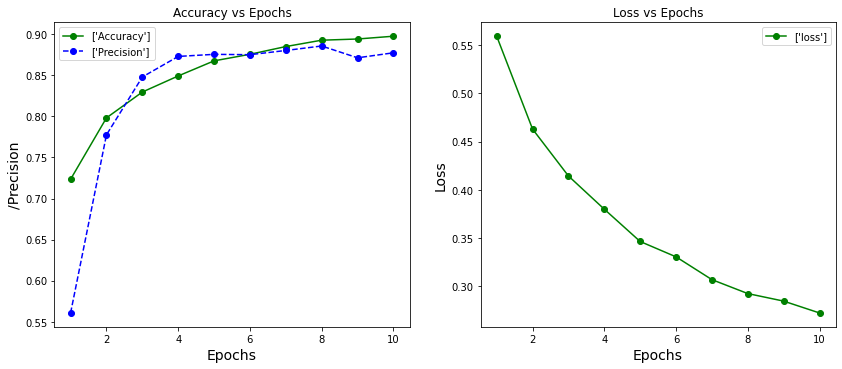

In [53]:
import matplotlib.pyplot as plt
acc = hist.history['binary_accuracy']
precision = hist.history['precision']
loss = hist.history['loss']
recall = hist.history['recall']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(14,5.6))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'go-', label=['Accuracy'])
plt.plot(epochs, precision, 'bo--', label=['Precision'])
plt.legend()
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("/Precision", fontsize=14)

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'go-', label=['loss'])
#plt.plot(epochs, val_loss, 'bo--', label=['Val_loss'])
plt.legend()
plt.title("Loss vs Epochs")
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)

plt.show()

In [54]:
model.evaluate(X_test, y_test)

33/33 [==============================] - 13s 368ms/step - loss: 0.2748 - binary_accuracy: 0.8812 - precision: 0.9155 - recall: 0.6500


[0.2748435437679291,
 0.8811594247817993,
 0.9154929518699646,
 0.6499999761581421]

In [55]:
y_pred = model.predict(X_test)
y_predicted = y_pred.flatten()

In [56]:
y_predicted

array([0.86182004, 0.7294873 , 0.12066575, ..., 0.9230005 , 0.516643  ,
       0.09969177], dtype=float32)

In [57]:
y_predicted.shape

(1035,)

In [58]:
import numpy as np
y = np.where(y_predicted>0.5,1,0)

In [59]:
y

array([1, 1, 0, ..., 1, 1, 0])

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y)
cm

array([[717,  18],
       [105, 195]])

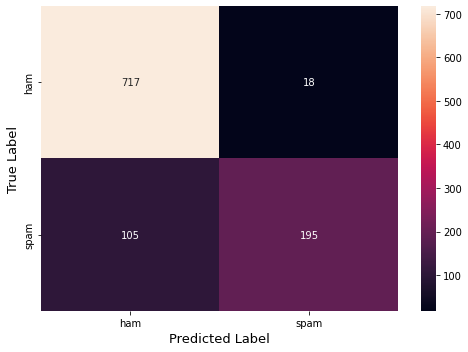

In [75]:
import seaborn as sns
plt.figure(figsize=(8,5.6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted Label", fontsize=13)
plt.ylabel("True Label", fontsize=13)
plt.xticks([0.5,1.5], labels=['ham', 'spam'] )
plt.yticks([0.5,1.5], labels=['ham', 'spam'])
plt.show()

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       735
           1       0.92      0.65      0.76       300

    accuracy                           0.88      1035
   macro avg       0.89      0.81      0.84      1035
weighted avg       0.88      0.88      0.87      1035



* ### Although we get accuracy and precision around 90% after 10 epochs, the f1-score and recall is lower for label 1 category. This is because the data is imbalanced.

* ### Let us now train the model using the balanced data

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_balanced['text'], df_balanced['label_num'],
                                                    stratify=df_balanced['label_num'],
                                                    test_size=0.2, random_state=0)

In [66]:
# Bert Model
input_text = tf.keras.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = preprocessing_unit(input_text)
encoded_text = bert_model(preprocessed_text)

# keras
l = tf.keras.layers.Dropout(0.1, name="dropout")(encoded_text['pooled_output'])
out = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(l)

modelb = tf.keras.Model(inputs=[input_text], outputs=[out])


In [67]:
modelb.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_1 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [68]:
metrices = [tf.keras.metrics.BinaryAccuracy(name='binary_accuracy'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')]

modelb.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = metrices)

In [69]:
history = modelb.fit(X_train, y_train, epochs=10)

Epoch 1/10
75/75 [==============================] - 31s 380ms/step - loss: 0.6535 - binary_accuracy: 0.6184 - precision: 0.6193 - recall: 0.6147
Epoch 2/10
75/75 [==============================] - 27s 360ms/step - loss: 0.5570 - binary_accuracy: 0.7081 - precision: 0.7057 - recall: 0.7139
Epoch 3/10
75/75 [==============================] - 27s 356ms/step - loss: 0.5163 - binary_accuracy: 0.7535 - precision: 0.7563 - recall: 0.7481
Epoch 4/10
75/75 [==============================] - 27s 364ms/step - loss: 0.4687 - binary_accuracy: 0.8019 - precision: 0.8057 - recall: 0.7957
Epoch 5/10
75/75 [==============================] - 27s 362ms/step - loss: 0.4439 - binary_accuracy: 0.8157 - precision: 0.8178 - recall: 0.8123
Epoch 6/10
75/75 [==============================] - 27s 358ms/step - loss: 0.4193 - binary_accuracy: 0.8357 - precision: 0.8414 - recall: 0.8274
Epoch 7/10
75/75 [==============================] - 27s 361ms/step - loss: 0.3962 - binary_accuracy: 0.8515 - precision: 0.8575 - 

In [70]:
lossb, accuracyb, precisionb, recallb = modelb.evaluate(X_test, y_test)

19/19 [==============================] - 8s 355ms/step - loss: 0.3396 - binary_accuracy: 0.8900 - precision: 0.9209 - recall: 0.8533


In [72]:
print("Performance Measure for balanced dataset")
print("============================================")
print("Loss: ", lossb)
print("Accuracy: ", accuracyb)
print("Precision: ", precisionb)
print("Recall: ", recallb)

Performance Measure for balanced dataset
Loss:  0.3395640552043915
Accuracy:  0.8899999856948853
Precision:  0.9208633303642273
Recall:  0.8533333539962769


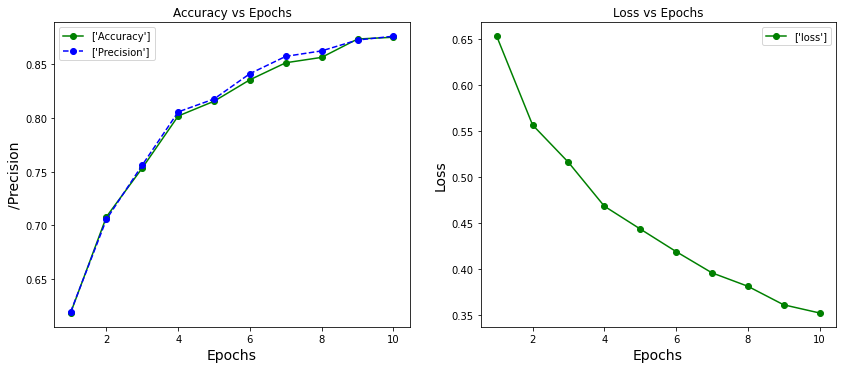

In [76]:
import matplotlib.pyplot as plt
accb = history.history['binary_accuracy']
precisionb = history.history['precision']
lossb = history.history['loss']
recallb = history.history['recall']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(14,5.6))
plt.subplot(1,2,1)
plt.plot(epochs, accb, 'go-', label=['Accuracy'])
plt.plot(epochs, precisionb, 'bo--', label=['Precision'])
plt.legend()
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("/Precision", fontsize=14)

plt.subplot(1,2,2)
plt.plot(epochs, lossb, 'go-', label=['loss'])
#plt.plot(epochs, val_loss, 'bo--', label=['Val_loss'])
plt.legend()
plt.title("Loss vs Epochs")
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)

plt.show()

In [77]:
y_pred = modelb.predict(X_test)
y_predicted = y_pred.flatten()

In [79]:
y_predicted[:10]

array([0.16199718, 0.90594345, 0.86783296, 0.44151062, 0.14270324,
       0.7260565 , 0.48914662, 0.22679509, 0.17977306, 0.0755659 ],
      dtype=float32)

In [80]:
y_predicted.shape

(600,)

In [81]:
import numpy as np
y = np.where(y_predicted>0.5,1,0)
y[:10]

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [82]:
from sklearn.metrics import confusion_matrix
cmb = confusion_matrix(y_test, y)
cmb

array([[278,  22],
       [ 44, 256]])

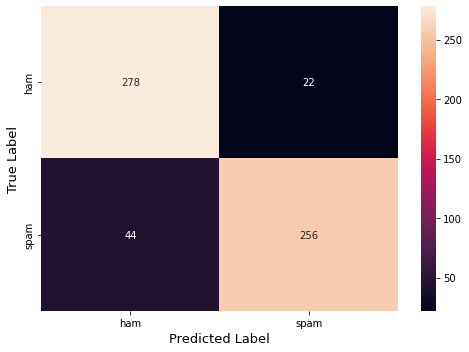

In [83]:
import seaborn as sns
plt.figure(figsize=(8,5.6))
sns.heatmap(cmb, annot=True, fmt='d')
plt.xlabel("Predicted Label", fontsize=13)
plt.ylabel("True Label", fontsize=13)
plt.xticks([0.5,1.5], labels=['ham', 'spam'] )
plt.yticks([0.5,1.5], labels=['ham', 'spam'])
plt.show()

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       300
           1       0.92      0.85      0.89       300

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



### Conclusion:
* Using the balanced dataset, precision, recall and f-score now become more than 85% for both the labels
* Comparing the confusion matrics also we can see that the wrong prediction of 'ham' label has now decresed a lot